In [ ]:
#if your environment don't have these libraries, uncomment them
# We guess you have panda, matplotlib
# requires Mongo 3,6+

#! pip install seaborn
#! pip install pymongo
#! pip install streamlit
#! pip install plotly.express as px

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import pymongo
from bson.son import SON

# Data Import

### first step is to read the csv files and export them into the MongoDB database

In [5]:
#importing data
# Foil-Market-Database.csv

# Component-Material.csv
# Foil-Brand.csv
# Foil-Component.csv
# Foil-Use.csv

#Had to re-record the files with Table Tool, so that every caraccter is in UTF8
File_Foil_Market = pd.read_csv('Timetonic_CSV/Cleaned/Foil-Market-Database.csv')

File_Component_Material = pd.read_csv('Timetonic_CSV/Cleaned/Component-Material.csv')
File_Foil_Brand = pd.read_csv('Timetonic_CSV/Cleaned/Foil-Brand.csv')
File_Foil_Component = pd.read_csv('Timetonic_CSV/Cleaned/Foil-Component.csv')
File_Foil_Use = pd.read_csv('Timetonic_CSV/Cleaned/Foil-Use.csv')


In [6]:
File_Foil_Market

,Product_Produit,Object-ID,Brand_Marque,Component-Type_Type-Composant,Model_Modele,Material_Materiau,Front-Wing-Surface_Surface-Aile-Avant_Cm2,Span-Length_Envergure-Longueur_Mm,Length_Longueur_Mm,High_Hauteur_Mm,Root-Chord_Empattement_Mm,Aspect-Ratio,Weight_Poids_g,Floatability_Flottabilite_L,Intended-Uses_Usages,Fuselage-Compatibility_Compatibilite-Fuselage,Box_Boitier
0,AFS-AFS Surf-Foil-Complet,14,AFS,Foil-Complet,AFS Surf,Carbon - Carbone,1295.0,800.0,724.0,730.0,NaN,NaN,NaN,NaN,Sup - surf,NaN,Tuttle
1,AFS-F800-Front Wing - Aile avant,17,AFS,Front Wing - Aile avant,F800,Carbon - Carbone,1120.0,800.0,NaN,NaN,NaN,NaN,NaN,NaN,Windsurfing,NaN,NaN
2,AFS-R1000-Front Wing - Aile avant,13,AFS,Front Wing - Aile avant,R1000,Carbon - Carbone,800.0,1000.0,NaN,NaN,NaN,NaN,NaN,NaN,Windsurfing,NaN,NaN
3,AFS-F700-Front Wing - Aile avant,15,AFS,Front Wing - Aile avant,F700,Carbon - Carbone,779.0,700.0,NaN,NaN,NaN,NaN,NaN,NaN,Windsurfing,NaN,NaN
4,AFS-F700A-Front Wing - Aile avant,20,AFS,Front Wing - Aile avant,F700A,Carbon - Carbone,779.0,700.0,NaN,NaN,NaN,NaN,NaN,NaN,Windsurfing,NaN,NaN
5,AFS-R800-Front Wing - Aile avant,19,AFS,Front Wing - Aile avant,R800,Carbon - Carbone,752.0,800.0,NaN,NaN,NaN,NaN,NaN,NaN,Windsurfing,NaN,NaN
6,AFS-R750-Front Wing - Aile avant,18,AFS,Front Wing - Aile avant,R750,Carbon - Carbone,736.0,750.0,NaN,NaN,NaN,NaN,NaN,NaN,Windsurfing,NaN,NaN
7,AFS-F700S-Front Wing - Aile avant,16,AFS,Front Wing - Aile avant,F700S,Carbon - Carbone,655.0,700.0,NaN,NaN,NaN,NaN,NaN,NaN,Windsurfing,NaN,NaN
8,GONG-GONG FOIL ALLVATOR SURF_SUP FRONT WING PR...,24,GONG,Front Wing - Aile avant,GONG FOIL ALLVATOR SURF_SUP FRONT WING PRO XXL,Mix - m�lange,2609.0,1200.0,NaN,NaN,NaN,NaN,3.4,4.20,Sup - surf,NaN,NaN
9,GONG-GONG FOIL ALLVATOR SURF_SUP FRONT WING XX...,25,GONG,Front Wing - Aile avant,GONG FOIL ALLVATOR SURF_SUP FRONT WING XXL,Mix - m�lange,2175.0,1000.0,NaN,NaN,NaN,NaN,2700.0,4.26,Sup - surf,NaN,NaN


In [7]:
File_Component_Material

,#,Material_Materiau
0,1,Carbon - Carbone
1,2,Aluminium
2,3,Titanium
3,4,Mix - mélange


In [8]:
File_Foil_Brand

,#,Brand
0,1,AFS
1,2,MOSES
2,3,GONG
3,4,ALPINEFOIL
4,5,NAISH
5,6,LOKEFOIL
6,7,GOFOIL
7,8,SLINGSHOT
8,9,PHANTOM
9,10,LOKEFOIL


In [9]:
File_Foil_Component

,#,Component
0,1,Front Wing - Aile avant
1,2,Fuselage
2,3,Stabilizer - Stabilisateur
3,4,Mast - Mât
4,5,Complete foil - foil complet


In [10]:
File_Foil_Use

,Use_Usage,#
0,Windsurfing,1
1,Kitesurfing,2
2,Sup - surf,3
3,Wake,4
4,Wing,6


In [14]:
# connection to the database
client = pymongo.MongoClient("mongodb://localhost:27017/")

db = client.Foil_Market

# Issue the serverStatus command and print the results
serverStatusResult=db.command("serverStatus")
print(serverStatusResult)

# we want to convert the different tables into MongoDB collections,
# to have parameter lists for further insertions in the database

# we File_Foil_Market as a big collection for easy consultation

{'host': 'Mac-mini-de-FXSUIRE.local', 'version': '4.2.8', 'process': 'mongod', 'pid': 7716, 'uptime': 1282.0, 'uptimeMillis': 1282078, 'uptimeEstimate': 1282, 'localTime': datetime.datetime(2020, 7, 19, 13, 36, 16, 148000), 'asserts': {'regular': 0, 'warning': 0, 'msg': 0, 'user': 0, 'rollovers': 0}, 'connections': {'current': 8, 'available': 196, 'totalCreated': 16, 'active': 1}, 'electionMetrics': {'stepUpCmd': {'called': 0, 'successful': 0}, 'priorityTakeover': {'called': 0, 'successful': 0}, 'catchUpTakeover': {'called': 0, 'successful': 0}, 'electionTimeout': {'called': 0, 'successful': 0}, 'freezeTimeout': {'called': 0, 'successful': 0}, 'numStepDownsCausedByHigherTerm': 0, 'numCatchUps': 0, 'numCatchUpsSucceeded': 0, 'numCatchUpsAlreadyCaughtUp': 0, 'numCatchUpsSkipped': 0, 'numCatchUpsTimedOut': 0, 'numCatchUpsFailedWithError': 0, 'numCatchUpsFailedWithNewTerm': 0, 'numCatchUpsFailedWithReplSetAbortPrimaryCatchUpCmd': 0, 'averageCatchUpOps': 0.0}, 'extra_info': {'note': 'fields

In [78]:
# We insert our records in our MongoDB
# has to run only once, so we leave it commented until use

def Execute_Import_Query(recordsToLoad):
    Load_Query = collection.insert_many(recordsToLoad)
    print(Load_Query)
    client.close()

In [158]:
# transfering File_Foil_Use.

df_File_Foil_Use = pd.DataFrame(File_Foil_Use)

df_File_Foil_Use['_id'] = df_File_Foil_Use[df_File_Foil_Use.columns[1:]].values

#We prepare a new dataframe as we want it to be stored in MongoDb
#We use _id, so that MongoDB uses our id from Timetonic
mg_df_File_Foil_Use = df_File_Foil_Use[['_id','Use_Usage']]

#We convert our df into json
records = json.loads(mg_df_File_Foil_Use.T.to_json()).values()

# We name our MongoDB new collection
collection = db['Foil_Use']

print(records)

dict_values([{'_id': 1, 'Use_Usage': 'Windsurfing'}, {'_id': 2, 'Use_Usage': 'Kitesurfing'}, {'_id': 3, 'Use_Usage': 'Sup - surf'}, {'_id': 4, 'Use_Usage': 'Wake'}, {'_id': 6, 'Use_Usage': 'Wing'}])


In [70]:
# We insert our records in our MongoDB
# has to run only once, so we leave it commented until use
#Query = collection.insert_many(records)

#print(Query)

In [75]:
# transfering File_Foil_Component.

df_File_Foil_Component = pd.DataFrame(File_Foil_Component)

df_File_Foil_Component['_id'] = df_File_Foil_Component[df_File_Foil_Component.columns[:1]].values

#We prepare a new dataframe as we want it to be stored in MongoDb
#We use _id, so that MongoDB uses our id from Timetonic
mg_df_File_Foil_Component = df_File_Foil_Component[['_id','Component']]

#We convert our df into json
records = json.loads(mg_df_File_Foil_Component.T.to_json()).values()

# We name our MongoDB new collection
collection = db['Foil_Component']

print(records)


dict_values([{'_id': 1, 'Component': 'Front Wing - Aile avant'}, {'_id': 2, 'Component': 'Fuselage'}, {'_id': 3, 'Component': 'Stabilizer - Stabilisateur'}, {'_id': 4, 'Component': 'Mast - Mât'}, {'_id': 5, 'Component': 'Complete foil - foil complet'}])


In [79]:
#Execute_Import_Query(records)

In [110]:
# transfering File_Foil_Brand.

df_File_Foil_Brand = pd.DataFrame(File_Foil_Brand)

df_File_Foil_Brand['_id'] = df_File_Foil_Brand[df_File_Foil_Brand.columns[:1]].values

#We prepare a new dataframe as we want it to be stored in MongoDb
#We use _id, so that MongoDB uses our id from Timetonic
mg_df_File_Foil_Brand = df_File_Foil_Brand[['_id','Brand']]

#We convert our df into json
records = json.loads(mg_df_File_Foil_Brand.T.to_json()).values()

# We name our MongoDB new collection
collection = db['Foil_Brand']

print(records)

dict_values([{'_id': 1, 'Brand': 'AFS'}, {'_id': 2, 'Brand': 'MOSES'}, {'_id': 3, 'Brand': 'GONG'}, {'_id': 4, 'Brand': 'ALPINEFOIL'}, {'_id': 5, 'Brand': 'NAISH'}, {'_id': 6, 'Brand': 'LOKEFOIL'}, {'_id': 7, 'Brand': 'GOFOIL'}, {'_id': 8, 'Brand': 'SLINGSHOT'}, {'_id': 9, 'Brand': 'PHANTOM'}, {'_id': 10, 'Brand': 'LOKEFOIL'}, {'_id': 11, 'Brand': 'SELECT'}])


In [111]:
Execute_Import_Query(records)

In [100]:
# transfering File_Component_Material.

df_File_Component_Material = pd.DataFrame(File_Component_Material)

df_File_Component_Material['_id'] = df_File_Component_Material[df_File_Component_Material.columns[:1]].values

#We prepare a new dataframe as we want it to be stored in MongoDb
#We use _id, so that MongoDB uses our id from Timetonic
mg_df_File_Component_Material = df_File_Component_Material[['_id','Material_Materiau']]

#We convert our df into json
records = json.loads(mg_df_File_Component_Material.T.to_json()).values()

# We name our MongoDB new collection
collection = db['Component_Material']

print(records)

dict_values([{'_id': 1, 'Material_Materiau': 'Carbon - Carbone'}, {'_id': 2, 'Material_Materiau': 'Aluminium'}, {'_id': 3, 'Material_Materiau': 'Titanium'}, {'_id': 4, 'Material_Materiau': 'Mix - mélange'}])


In [101]:
#Execute_Import_Query(records)

In [98]:
#We need the list of columns
print(File_Foil_Market.columns)

print(len(File_Foil_Market.columns))

Index(['Product_Produit', 'Object-ID', 'Brand_Marque',
       'Component-Type_Type-Composant', 'Model_Modele', 'Material_Materiau',
       'Front-Wing-Surface_Surface-Aile-Avant_Cm2',
       'Span-Length_Envergure-Longueur_Mm', 'Length_Longueur_Mm',
       'High_Hauteur_Mm', 'Root-Chord_Empattement_Mm', 'Aspect-Ratio',
       'Weight_Poids_g', 'Floatability_Flottabilite_L', 'Intended-Uses_Usages',
       'Fuselage-Compatibility_Compatibilite-Fuselage', 'Box_Boitier', '_id'],
      dtype='object')
18


In [103]:
# transfering File_Foil_Market.

df_File_Foil_Market = pd.DataFrame(File_Foil_Market)

#
df_File_Foil_Market['Id_Timetonic'] = df_File_Foil_Market['Object-ID'].values

#We prepare a new dataframe as we want it to be stored in MongoDb
#We use _id, so that MongoDB uses our id from Timetonic
mg_df_File_Foil_Market = df_File_Foil_Market[['Id_Timetonic','Product_Produit','Brand_Marque',
       'Component-Type_Type-Composant', 'Model_Modele', 'Material_Materiau',
       'Front-Wing-Surface_Surface-Aile-Avant_Cm2',
       'Span-Length_Envergure-Longueur_Mm', 'Length_Longueur_Mm',
       'High_Hauteur_Mm', 'Root-Chord_Empattement_Mm', 'Aspect-Ratio',
       'Weight_Poids_g', 'Floatability_Flottabilite_L', 'Intended-Uses_Usages',
       'Fuselage-Compatibility_Compatibilite-Fuselage', 'Box_Boitier']]

#We convert our df into json
records = json.loads(mg_df_File_Foil_Market.T.to_json()).values()

# We name our MongoDB new collection
collection = db['Foil_Database']

print(records)

dict_values([{'Id_Timetonic': 14, 'Product_Produit': 'AFS-AFS Surf-Foil-Complet', 'Brand_Marque': 'AFS', 'Component-Type_Type-Composant': 'Foil-Complet', 'Model_Modele': 'AFS Surf', 'Material_Materiau': 'Carbon - Carbone', 'Front-Wing-Surface_Surface-Aile-Avant_Cm2': 1295.0, 'Span-Length_Envergure-Longueur_Mm': 800.0, 'Length_Longueur_Mm': 724.0, 'High_Hauteur_Mm': 730.0, 'Root-Chord_Empattement_Mm': None, 'Aspect-Ratio': None, 'Weight_Poids_g': None, 'Floatability_Flottabilite_L': None, 'Intended-Uses_Usages': 'Sup - surf', 'Fuselage-Compatibility_Compatibilite-Fuselage': None, 'Box_Boitier': 'Tuttle'}, {'Id_Timetonic': 17, 'Product_Produit': 'AFS-F800-Front Wing - Aile avant', 'Brand_Marque': 'AFS', 'Component-Type_Type-Composant': 'Front Wing - Aile avant', 'Model_Modele': 'F800', 'Material_Materiau': 'Carbon - Carbone', 'Front-Wing-Surface_Surface-Aile-Avant_Cm2': 1120.0, 'Span-Length_Envergure-Longueur_Mm': 800.0, 'Length_Longueur_Mm': None, 'High_Hauteur_Mm': None, 'Root-Chord_Em

In [104]:
#Execute_Import_Query(records)

# Data queries
### Now that we have our data in the database, we want to query it
### make some graph
### let the final user play with it in a user friendly interface 

In [15]:
# we want to read all the data from the collection "Foil_Database"
# and have it in a dataframe

collection = db["Foil_Database"]

query = {}

cursor = collection.find(query)

# Expand the cursor and construct the DataFrame
Read_mg_df_Foil_Market =  pd.DataFrame(list(cursor))
    
client.close()

#Display the data into a human readable table     
Read_mg_df_Foil_Market



,_id,Id_Timetonic,Product_Produit,Brand_Marque,Component-Type_Type-Composant,Model_Modele,Material_Materiau,Front-Wing-Surface_Surface-Aile-Avant_Cm2,Span-Length_Envergure-Longueur_Mm,Length_Longueur_Mm,High_Hauteur_Mm,Root-Chord_Empattement_Mm,Aspect-Ratio,Weight_Poids_g,Floatability_Flottabilite_L,Intended-Uses_Usages,Fuselage-Compatibility_Compatibilite-Fuselage,Box_Boitier
0,5f134b776fe5bec0f75963f3,14,AFS-AFS Surf-Foil-Complet,AFS,Foil-Complet,AFS Surf,Carbon - Carbone,1295.0,800.0,724.0,730.0,NaN,NaN,NaN,NaN,Sup - surf,None,Tuttle
1,5f134b776fe5bec0f75963f4,17,AFS-F800-Front Wing - Aile avant,AFS,Front Wing - Aile avant,F800,Carbon - Carbone,1120.0,800.0,NaN,NaN,NaN,NaN,NaN,NaN,Windsurfing,None,None
2,5f134b776fe5bec0f75963f5,13,AFS-R1000-Front Wing - Aile avant,AFS,Front Wing - Aile avant,R1000,Carbon - Carbone,800.0,1000.0,NaN,NaN,NaN,NaN,NaN,NaN,Windsurfing,None,None
3,5f134b776fe5bec0f75963f6,15,AFS-F700-Front Wing - Aile avant,AFS,Front Wing - Aile avant,F700,Carbon - Carbone,779.0,700.0,NaN,NaN,NaN,NaN,NaN,NaN,Windsurfing,None,None
4,5f134b776fe5bec0f75963f7,20,AFS-F700A-Front Wing - Aile avant,AFS,Front Wing - Aile avant,F700A,Carbon - Carbone,779.0,700.0,NaN,NaN,NaN,NaN,NaN,NaN,Windsurfing,None,None
5,5f134b776fe5bec0f75963f8,19,AFS-R800-Front Wing - Aile avant,AFS,Front Wing - Aile avant,R800,Carbon - Carbone,752.0,800.0,NaN,NaN,NaN,NaN,NaN,NaN,Windsurfing,None,None
6,5f134b776fe5bec0f75963f9,18,AFS-R750-Front Wing - Aile avant,AFS,Front Wing - Aile avant,R750,Carbon - Carbone,736.0,750.0,NaN,NaN,NaN,NaN,NaN,NaN,Windsurfing,None,None
7,5f134b776fe5bec0f75963fa,16,AFS-F700S-Front Wing - Aile avant,AFS,Front Wing - Aile avant,F700S,Carbon - Carbone,655.0,700.0,NaN,NaN,NaN,NaN,NaN,NaN,Windsurfing,None,None
8,5f134b776fe5bec0f75963fb,24,GONG-GONG FOIL ALLVATOR SURF_SUP FRONT WING PR...,GONG,Front Wing - Aile avant,GONG FOIL ALLVATOR SURF_SUP FRONT WING PRO XXL,Mix - m�lange,2609.0,1200.0,NaN,NaN,NaN,NaN,3.4,4.20,Sup - surf,None,None
9,5f134b776fe5bec0f75963fc,25,GONG-GONG FOIL ALLVATOR SURF_SUP FRONT WING XX...,GONG,Front Wing - Aile avant,GONG FOIL ALLVATOR SURF_SUP FRONT WING XXL,Mix - m�lange,2175.0,1000.0,NaN,NaN,NaN,NaN,2700.0,4.26,Sup - surf,None,None


In [16]:
# We want a more elaborate query with a count
# front wing in an hydrofoil is one of the main criteria to choose an appropriate foil
# we want to know how many front wings we have for each brand

collection = db["Foil_Database"]

pipeline = [
    {
        u"$match": {
            u"Component-Type_Type-Composant": u"Front Wing - Aile avant"
        }
    }, 
    {
        u"$group": {
            u"_id": {
                u"Brand_Marque": u"$Brand_Marque"
            },
            u"COUNT(*)": {
                u"$sum": 1
            }
        }
    }, 
    {
        u"$project": {
            u"Brand_Marque": u"$_id.Brand_Marque",
            u"COUNT(*)": u"$COUNT(*)",
            u"_id": 0
        }
    }, 
    {
        u"$sort": SON([ (u"COUNT(*)", 1) ])
    }
]

cursor = collection.aggregate(
    pipeline, 
    allowDiskUse = True
)

# Expand the cursor and construct the DataFrame
Read_mg_df_Front_Wing_Range =  pd.DataFrame(list(cursor))

#We rename the count column in something more uder friendly
Read_mg_df_Front_Wing_Range = Read_mg_df_Front_Wing_Range.rename(columns={"COUNT(*)": "Front_Wing_Number_in_Range"})
    
client.close()

Read_mg_df_Front_Wing_Range

,Brand_Marque,Front_Wing_Number_in_Range
0,MOSES,6
1,PHANTOM,6
2,AFS,7
3,GONG,8


# Visualizing data
### Now we want to display our data

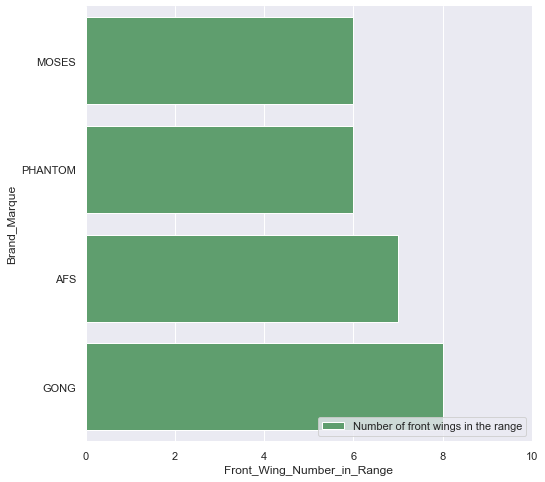

In [17]:
# Displays the graph in this notebook
#sns.set(style="whitegrid")
sns.set(style="darkgrid")


# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(8, 8))

#sns.set_color_codes("pastel")
sns.barplot(x="Front_Wing_Number_in_Range", y="Brand_Marque", data=Read_mg_df_Front_Wing_Range,
            label="Number of front wings in the range", color="g")


# Add a legend and informative axis label
ax.legend(ncol=1, loc="lower right", frameon=True)
ax.set(xlim=(0, 10))
sns.despine(left=True, bottom=True)

In [152]:
# Now we want to display in more user friendly interface
# we use streamlit
# with a terminal please go in the directory you stored the dashboard.py
# cd 'Google Drive'/_00_Dev/python/NoSQL/FoilMarket-BDD


# in a terminal run:
# streamlit hello
# complete the launching process
# run: streamlit run dashboard.py


/bin/sh: streamlit: command not found


In [22]:
#Filtered table

Brand_Marque_List = ['AFS', 'GONG']

Filtered_Read_mg_df_Foil_Market = Read_mg_df_Foil_Market[Read_mg_df_Foil_Market['Brand_Marque'].isin(Brand_Marque_List)]

Filtered_Read_mg_df_Foil_Market

,_id,Id_Timetonic,Product_Produit,Brand_Marque,Component-Type_Type-Composant,Model_Modele,Material_Materiau,Front-Wing-Surface_Surface-Aile-Avant_Cm2,Span-Length_Envergure-Longueur_Mm,Length_Longueur_Mm,High_Hauteur_Mm,Root-Chord_Empattement_Mm,Aspect-Ratio,Weight_Poids_g,Floatability_Flottabilite_L,Intended-Uses_Usages,Fuselage-Compatibility_Compatibilite-Fuselage,Box_Boitier
0,5f134b776fe5bec0f75963f3,14,AFS-AFS Surf-Foil-Complet,AFS,Foil-Complet,AFS Surf,Carbon - Carbone,1295.0,800.0,724.0,730.0,NaN,NaN,NaN,NaN,Sup - surf,None,Tuttle
1,5f134b776fe5bec0f75963f4,17,AFS-F800-Front Wing - Aile avant,AFS,Front Wing - Aile avant,F800,Carbon - Carbone,1120.0,800.0,NaN,NaN,NaN,NaN,NaN,NaN,Windsurfing,None,None
2,5f134b776fe5bec0f75963f5,13,AFS-R1000-Front Wing - Aile avant,AFS,Front Wing - Aile avant,R1000,Carbon - Carbone,800.0,1000.0,NaN,NaN,NaN,NaN,NaN,NaN,Windsurfing,None,None
3,5f134b776fe5bec0f75963f6,15,AFS-F700-Front Wing - Aile avant,AFS,Front Wing - Aile avant,F700,Carbon - Carbone,779.0,700.0,NaN,NaN,NaN,NaN,NaN,NaN,Windsurfing,None,None
4,5f134b776fe5bec0f75963f7,20,AFS-F700A-Front Wing - Aile avant,AFS,Front Wing - Aile avant,F700A,Carbon - Carbone,779.0,700.0,NaN,NaN,NaN,NaN,NaN,NaN,Windsurfing,None,None
5,5f134b776fe5bec0f75963f8,19,AFS-R800-Front Wing - Aile avant,AFS,Front Wing - Aile avant,R800,Carbon - Carbone,752.0,800.0,NaN,NaN,NaN,NaN,NaN,NaN,Windsurfing,None,None
6,5f134b776fe5bec0f75963f9,18,AFS-R750-Front Wing - Aile avant,AFS,Front Wing - Aile avant,R750,Carbon - Carbone,736.0,750.0,NaN,NaN,NaN,NaN,NaN,NaN,Windsurfing,None,None
7,5f134b776fe5bec0f75963fa,16,AFS-F700S-Front Wing - Aile avant,AFS,Front Wing - Aile avant,F700S,Carbon - Carbone,655.0,700.0,NaN,NaN,NaN,NaN,NaN,NaN,Windsurfing,None,None
8,5f134b776fe5bec0f75963fb,24,GONG-GONG FOIL ALLVATOR SURF_SUP FRONT WING PR...,GONG,Front Wing - Aile avant,GONG FOIL ALLVATOR SURF_SUP FRONT WING PRO XXL,Mix - m�lange,2609.0,1200.0,NaN,NaN,NaN,NaN,3.4,4.20,Sup - surf,None,None
9,5f134b776fe5bec0f75963fc,25,GONG-GONG FOIL ALLVATOR SURF_SUP FRONT WING XX...,GONG,Front Wing - Aile avant,GONG FOIL ALLVATOR SURF_SUP FRONT WING XXL,Mix - m�lange,2175.0,1000.0,NaN,NaN,NaN,NaN,2700.0,4.26,Sup - surf,None,None
